# Quantum Approximate Optimization Algorithm (QAOA) Demonstration

## 1- pyQuil Implementation

In [1]:
import numpy as np
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
import pyquil.api as api
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
from dimod import ExactSolver,SimulatedAnnealingSampler

### Assign network edges. 

In [2]:
nw_edges=[(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(7,0),(7,8),(8,9),(9,2),(9,10),(10,11),(11,4),(11,12),(12,6),(0,10),(3,12)]
#nw_edges=[(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),(3,6),(3,7),(3,8),(3,9),(3,10),(3,11),(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),(5,6),(5,7),(5,8),(5,9),(5,10),(5,11)]

### Run optimization on QVM

In [3]:
steps = 2
inst = maxcut_qaoa(graph=nw_edges, steps=steps)
betas, gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [ 1.8674796   0.9912634   0.17399806  3.72077984] 
	E => -9.400584487364355
	Parameters: [ 1.8674796   0.9912634   0.17399806  3.72077984] 
	E => -9.257006802040573
	Parameters: [ 1.97716591  1.04948519  0.16115785  3.66910235] 
	E => -9.71323050551975
	Parameters: [ 1.97716591  1.04948519  0.16115785  3.66910235] 
	E => -9.364947658705738
	Parameters: [ 1.97716591  1.04948519  0.16115785  3.66910235] 
	E => -9.487845779370984
	Parameters: [ 1.97716591  1.04948519  0.16115785  3.66910235] 
	E => -9.491067795003305
	Parameters: [ 1.97716591  1.04948519  0.16115785  3.66910235] 
	E => -9.621124044137272
	Parameters: [ 2.03702701  1.12114716  0.15709077  3.6010233 ] 
	E => -9.922040346345554
	Parameters: [ 2.03702701  1.12114716  0.15709077  3.6010233 ] 
	E => -9.710276500733501
	Parameters: [ 2.02001727  1.20819247  0.13865851  3.62150631] 
	E => -10.160187696263584
	Parameters: [ 2.02001727  1.20819247  0.13865851  3.62150631]

In [4]:
qvm_connection = api.QVMConnection()
t = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes
wlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    wlist.append([inst.states[state_index], ww.real])
wlist.sort(key=lambda x: float(x[1]),reverse=True)

### List of partioning solutions with weights

In [5]:
wlist

[['0101010101010', 0.0063697525706443298],
 ['1010101010101', 0.0063697525706443298],
 ['0101011001010', 0.006369752570644328],
 ['1010100110101', 0.006369752570644328],
 ['0100101010101', 0.0056834267232592026],
 ['1011010101010', 0.0056834267232592026],
 ['0011011011010', 0.0056834267232591992],
 ['1100100100101', 0.0056834267232591992],
 ['0101011101010', 0.0050247990571279681],
 ['1010100010101', 0.0050247990571279681],
 ['0100100101101', 0.004388470348191992],
 ['1011011010010', 0.004388470348191992],
 ['0100101001101', 0.0043884703481919893],
 ['1011010110010', 0.0043884703481919893],
 ['0100101101101', 0.0035976933914909416],
 ['1011010010010', 0.0035976933914909416],
 ['0010101010101', 0.0035860463508596376],
 ['1101010101010', 0.0035860463508596376],
 ['0101011011010', 0.0035860463508596355],
 ['1010100100101', 0.0035860463508596355],
 ['0101011010101', 0.0032634954078226419],
 ['1010100101010', 0.0032634954078226419],
 ['0010101011010', 0.0032634954078226363],
 ['110101010010

In [6]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[0][0])):
    if wlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
#print("maxcut0 is ",mxcutlist0)
#print("maxcut1 is ",mxcutlist1)

### Graph diagram and max cut partioning sets from pyQuil

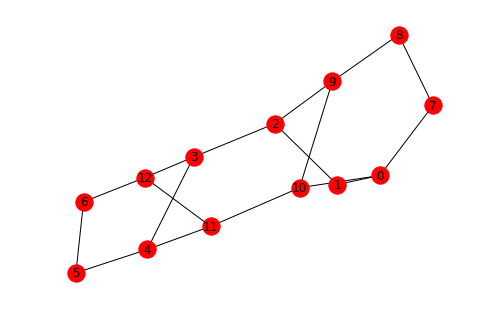

the first set from maxcut partioning is  [0, 2, 4, 6, 8, 10, 12]
the second set from maxcut partioning is  [1, 3, 5, 7, 9, 11]


In [7]:
G1 = nx.Graph()
G1.add_edges_from(nw_edges)
pos = nx.spring_layout(G1)
#gd.draw_custom(G2,pos)
nx.draw(G1,pos,with_labels=True)
plt.show()
print("the first set from maxcut partioning is ",mxcutlist0)
print("the second set from maxcut partioning is ",mxcutlist1)

### 2 - Quantum annealing using dimod

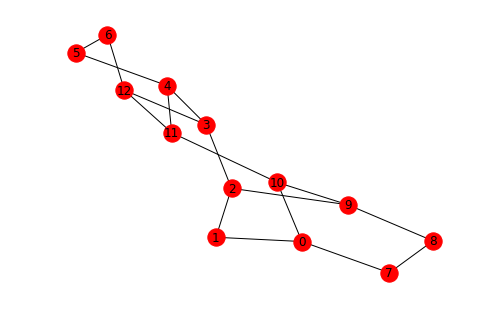

Max cut set :  {1, 3, 5, 7, 9, 11}


In [8]:
sampler = SimulatedAnnealingSampler() 
G = nx.Graph() 
G.add_edges_from(nw_edges)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
#nx.draw_networkx_nodes(G,pos)
plt.show()
nodeset = dnx.maximum_cut(G, ExactSolver())
print ("Max cut set : ", nodeset)

### 3 - Randomly Generated Graph Example for both methods

In [9]:
import random
random.seed()

### Generate random graph

In [10]:
seed = random.randrange(1, 1000)
GR = nx.erdos_renyi_graph(n=12, p=0.3, seed=seed)
pos = nx.spring_layout(GR)

### Finding max cut segments

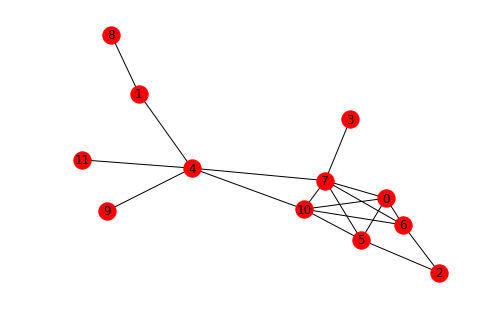

Max cut set :  {1, 2, 7, 9, 10, 11}


In [11]:
nx.draw(GR,pos,with_labels=True)
#nx.draw_networkx_nodes(G,pos)
plt.show()
nodeset = dnx.maximum_cut(GR, ExactSolver())
print ("Max cut set : ", nodeset)

In [12]:
steps = 2
inst = maxcut_qaoa(graph=GR, steps=steps)
betas, gammas = inst.get_angles()
qvm_connection = api.QVMConnection()
t = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes
wlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    wlist.append([inst.states[state_index], ww.real])
wlist.sort(key=lambda x: float(x[1]),reverse=True)

                     models will be ineffective
	Parameters: [ 3.18773129  1.46258931  2.2009673   2.65044724] 
	E => -9.459499742194206
	Parameters: [ 3.18773129  1.46258931  2.2009673   2.65044724] 
	E => -9.094457237113838
	Parameters: [ 3.18773129  1.46258931  2.2009673   2.65044724] 
	E => -9.213890951677776
	Parameters: [ 3.18773129  1.46258931  2.2009673   2.65044724] 
	E => -9.453263007204201
	Parameters: [ 3.33055509  1.21374599  2.39239179  2.5815915 ] 
	E => -9.829892186474458
	Parameters: [ 3.33055509  1.21374599  2.39239179  2.5815915 ] 
	E => -9.778255872275981
	Parameters: [ 3.33055509  1.21374599  2.39239179  2.5815915 ] 
	E => -9.797673196432163
	Parameters: [ 3.25299216  1.12423857  2.41010477  2.74711971] 
	E => -9.761692412922082
	Parameters: [ 3.25299216  1.12423857  2.41010477  2.74711971] 
	E => -9.829854545168827
	Parameters: [ 3.25299216  1.12423857  2.41010477  2.74711971] 
	E => -10.06396255533558
	Parameters: [ 3.07890924  1.24375042  2.54496069  2.59376326]

In [13]:
wlist

[['010100011101', 0.0061793430679795225],
 ['101011100010', 0.0061793430679795225],
 ['000110010101', 0.0050828573806116469],
 ['111001101010', 0.0050828573806116469],
 ['010101111000', 0.0043923059081423825],
 ['101010000111', 0.0043923059081423825],
 ['010110010100', 0.0043458628468977193],
 ['101001101011', 0.0043458628468977193],
 ['000111110000', 0.0043323931338848211],
 ['111000001111', 0.0043323931338848211],
 ['000101111001', 0.0041655025658176381],
 ['111010000110', 0.0041655025658176381],
 ['000101111000', 0.004075786979202003],
 ['111010000111', 0.004075786979202003],
 ['010000011111', 0.0040473271536310496],
 ['101111100000', 0.0040473271536310496],
 ['011100011101', 0.0039459407899768697],
 ['100011100010', 0.0039459407899768697],
 ['001011100010', 0.0039459407899768671],
 ['110100011101', 0.0039459407899768671],
 ['001101111001', 0.0038837466569721837],
 ['110010000110', 0.0038837466569721837],
 ['011010000110', 0.0038837466569721828],
 ['100101111001', 0.0038837466569721

In [14]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[0][0])):
    if wlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)

In [15]:
print("the first set from maxcut partioning is ",mxcutlist0)
print("the second set from maxcut partioning is ",mxcutlist1)

the first set from maxcut partioning is  [0, 2, 4, 5, 6, 10]
the second set from maxcut partioning is  [1, 3, 7, 8, 9, 11]
